# Workflow for Gradient Descent on Weather Data

## Data Preparation
1. **Load Data**: Start with a scaled dataset containing weather data, focusing on the relevant columns for a specific location (e.g., Basel).
2. **Create Day Index**: Set up an index representing each day of the year to align with the data.
3. **Filter by Year**: Create a subset for the specific year of interest (e.g., Basel in 1960).

## Defining and Initializing Parameters
4. **Drop Unscaled Columns**: Remove DATE and MONTH columns to keep only scaled data.
5. **Prepare X and y for Gradient Descent**: Construct the feature matrix (X) and target vector (y, for temperature).
6. **Visualize Initial Data**: Plot the initial data to confirm it’s correctly prepared.

## Gradient Descent Implementation
7. **Define Cost Function**: Use `compute_cost` to calculate Mean Squared Error (MSE) for given parameter values.
8. **Implement Gradient Descent**: Develop a function that iteratively updates θ₀ and θ₁ to minimize the cost function.
9. **Run Gradient Descent**: Run gradient descent with initial parameters θ = [0, 0], a chosen learning rate (`alpha`), and a set number of iterations (`num_iterations`).

## Visualization
10. **Plot Convergence**: Visualize θ₀, θ₁, and the cost function over iterations to observe convergence.
11. **3D Surface Plot**: Generate a 3D plot of the cost function landscape for θ₀ and θ₁ values, showing where the minimum cost occurs.

## Challenges & Adjustments
- **Debugging**: Address reshaping issues, TypeErrors, and confirm the dimensions of X and y are correct.
- **Parameter Tuning**: Adjust initial values and learning rate as needed to ensure smooth convergence, minimizing the loss function effectively.

In [201]:
# Core Libraries
import pandas as pd
import numpy as np
import os
import calendar

# Plotting and Visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
from mpl_toolkits import mplot3d



# Plotly for Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

1. Loading scaled weather data frame:

In [4]:
# Importing the CSV file as df
file_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Data Sets\01 Raw Data\weather-data_scaled.csv'
df = pd.read_csv(file_path)

# Display the first few rows to confirm successful import
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1           0.660514          -0.02793        0.826097   
1  19600102      1           0.244897          -0.02793        0.735760   
2  19600103      1           1.076130          -0.02793        1.277781   
3  19600104      1          -1.001953          -0.02793        1.458455   
4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0         -0.179228       -0.902918  ...             -0.443701   
1         -0.179228       -0.810126  ...              0.783085   
2         -0.179228       -1.065304  ...              0.783085   
3         -0.179228       -0.114186  ...              0.783085   
4         -0.179228        0.187388  ...             -1.670486   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.761754          -1.299744                  -0.806427   
1           1.183580          -1.262455                  -1.042055   
2           1.183580          -0.432779                  -1.136306   
3           0.480538           0.387574                  -1.183432   
4          -0.363113           1.729970                  -0.794645   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.088407            -0.024706           0.372147   
1                0.503361            -0.024706          -0.829285   
2               -0.396127            -0.024706          -1.009500   
3                0.669056            -0.024706          -1.039536   
4               -0.490810            -0.024706           0.672505   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -0.668215          -0.519743          -0.752237  
1           -0.548046          -0.629054          -0.407141  
2           -0.067372           0.054135          -0.177078  
3           -0.998679          -0.164486          -0.838511  
4           -1.509396          -1.339569          -1.471186  

[5 rows x 170 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(168), int64(2)
memory usage: 29.8 MB


---

## Steps for Gradient Descent for Year and Location: Basel, 1960

2. **Creating an index** for the days of the year, scaled by 100. This ensures smooth convergence during gradient descent:

In [115]:
# Adjust the index to include 366 days for the leap year if necessary
i = np.arange(0.01, 3.67, 0.01)  # Scale days by 100 and make sure it has 366 entries for leap year
index_df = pd.DataFrame(data=i, columns=['index'])
index_df.head()

index
0   0.01
1   0.02
2   0.03
3   0.04
4   0.05

3. Creating a subset for Basel focused on year 1960
4. Drop Unscaled Columns: Remove DATE and MONTH columns to keep only scaled data.

In [106]:
# Ensure DATE is in string format for filtering by year
df['DATE'] = df['DATE'].astype(str)

# Define Basel-specific columns, excluding DATE and MONTH
basel_columns = [col for col in df.columns if 'BASEL' in col]

# Filter for the year 1960 and select only Basel columns
basel_1960 = df[df['DATE'].str.startswith('1960')][basel_columns]

# Display the first few rows of the filtered Basel data for 1960
basel_1960.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0           0.660514          -0.02793        0.826097       -0.001949   
1           0.244897          -0.02793        0.735760       -0.001949   
2           1.076130          -0.02793        1.277781       -0.001949   
3          -1.001953          -0.02793        1.458455       -0.001949   
4           0.244897          -0.02793        1.729466       -0.001949   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0               -1.101066            -0.265148         -0.179228   
1               -1.058108             1.658760         -0.179228   
2               -1.251420             0.155707         -0.179228   
3               -0.821838            -0.445514         -0.179228   
4               -0.746661            -0.164944         -0.179228   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
0       -0.902918        -0.528623       -0.845652       -0.478356  
1       -0.810126        -0.582946       -0.462450       -0.569988  
2       -1.065304        -0.257010       -0.186545       -0.592896  
3       -0.114186        -0.555784       -0.385810       -0.512718  
4        0.187388        -1.003946       -1.075573       -1.039603

In [108]:
basel_1960.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BASEL_cloud_cover       366 non-null    float64
 1   BASEL_wind_speed        366 non-null    float64
 2   BASEL_humidity          366 non-null    float64
 3   BASEL_pressure          366 non-null    float64
 4   BASEL_global_radiation  366 non-null    float64
 5   BASEL_precipitation     366 non-null    float64
 6   BASEL_snow_depth        366 non-null    float64
 7   BASEL_sunshine          366 non-null    float64
 8   BASEL_temp_mean         366 non-null    float64
 9   BASEL_temp_min          366 non-null    float64
 10  BASEL_temp_max          366 non-null    float64
dtypes: float64(11)
memory usage: 34.3 KB


In [111]:
# Ensure correct row count for basel_1960
n_rows = basel_1960.shape[0]

5. Prepare the data as X and y arrays for linear regression:
X has two columns: one for the intercept (a column of ones) and one for the time index.
y is the target variable.

In [117]:
# Prepare X and y datasets for gradient descent using basel_1960
X = index_df.to_numpy().reshape(n_rows, 1)
ones = np.ones((n_rows, 1))  # x0 is a vector of 1s for intercept
X = np.concatenate((ones, X), axis=1)
y = basel_1960['BASEL_temp_mean'].to_numpy().reshape(n_rows, 1)

In [120]:
# Display shapes to confirm they match
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (366, 2)
y shape: (366, 1)


6. Plot displays basel_1960 temperature data for 1960 with index_df as the x-axis.

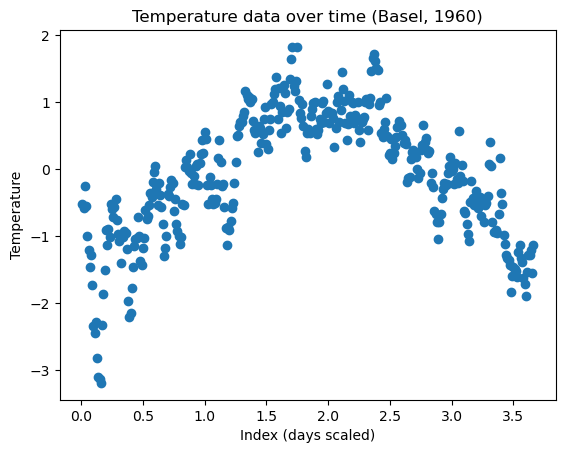

In [127]:
#Plot Basel temperature data for 1960
plt.scatter(x=index_df['index'], y=basel_1960['BASEL_temp_mean'])
plt.xlabel('Index (days scaled)')
plt.ylabel('Temperature')
plt.title('Temperature data over time (Basel, 1960)')
plt.show()

7. Define the cost function, compute_cost, for calculating the loss in gradient descent.

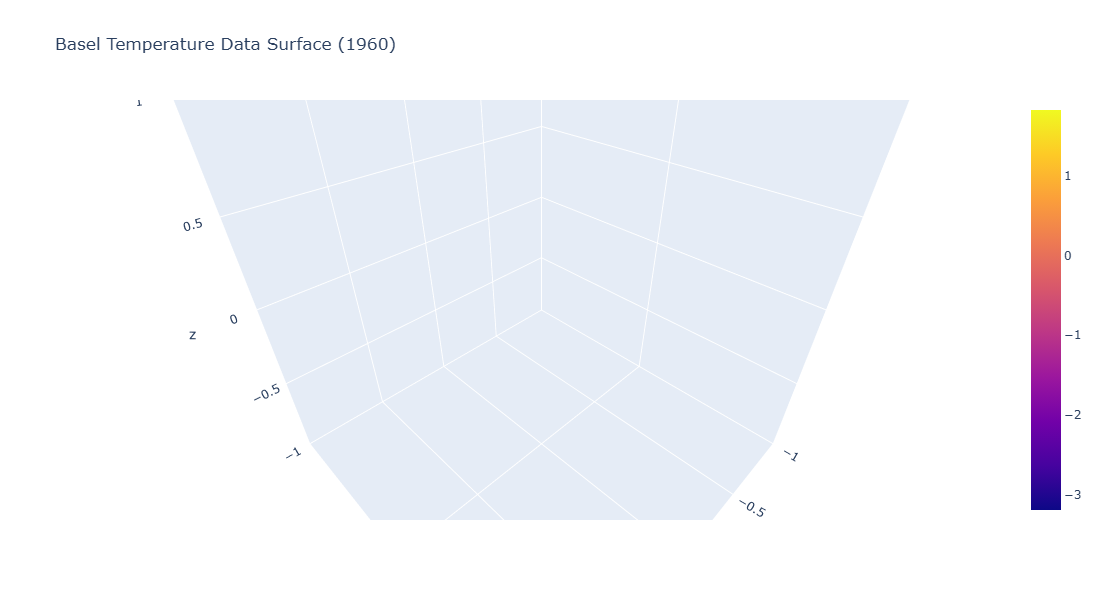

In [134]:
# Cost function for gradient descent
def compute_cost(X, y, theta=np.array([[0], [0]])):
    """Compute the loss for given X, y, and theta"""
    m = len(y)
    theta = theta.reshape(2, 1)
    h_x = np.dot(X, theta)
    error_term = np.sum((h_x - y) ** 2)
    loss = error_term / (2 * m)
    return loss

# Surface plot with Plotly
fig = go.Figure(data=[go.Surface(z=basel_1960['BASEL_temp_mean'].values.reshape(-1, 1))])
fig.update_layout(title='Basel Temperature Data Surface (1960)', autosize=False, width=600, height=600)
fig.show()

Verifying initial cost with default theta

In [136]:
# Run compute_cost to verify initial cost with default theta
initial_theta = np.array([[0], [0]])  # Initial guess for theta
initial_cost = compute_cost(X, y, initial_theta)
print("Initial cost with initial theta:", initial_cost)

Initial cost with initial theta: 0.44192340720043827


8. Performing Gradient Descent function

In [148]:
# Gradient Descent function
def gradient_descent(X, y, theta=np.array([[0], [0]]), alpha=0.05, num_iterations=500):
    """
    Solve for theta using Gradient Descent optimization technique. 
    Alpha is the learning rate.
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2, 1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha / m) * np.sum(error * X[:, 0].reshape(m, 1))
        term1 = (alpha / m) * np.sum(error * X[:, 1].reshape(m, 1))
        
        # Update theta
        theta = theta - np.array([[term0], [term1]]).reshape(2, 1)
        
        # Store history values
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
        J_history.append(compute_cost(X, y, theta))
        
    return theta, J_history, theta0_history, theta1_history

9. Running gradient descent with initial parameters
10. Visualize θ₀, θ₁, and the cost function over iterations to observe convergence.

Optimized theta values: [[-0.36277476]
 [ 0.14214167]]


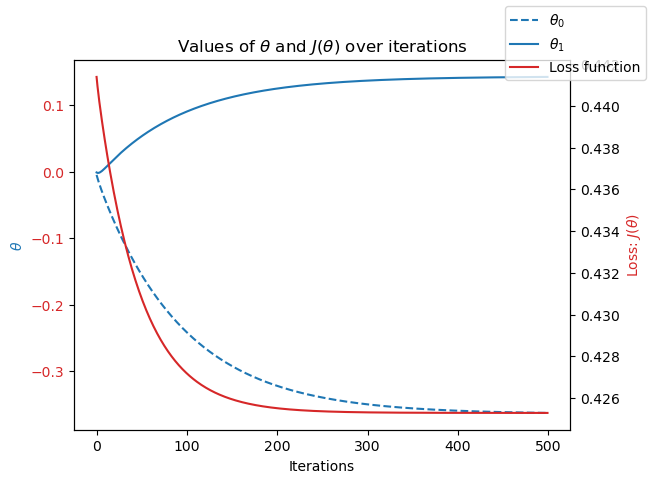

In [159]:
# Run gradient descent with initial parameters
initial_theta = np.array([[0], [0]])
alpha = 0.05
num_iterations = 500

theta, J_history, theta0_history, theta1_history = gradient_descent(X, y, initial_theta, alpha, num_iterations)

# Display the optimized theta values
print("Optimized theta values:", theta)

# Plot theta values and loss over iterations
fig, ax1 = plt.subplots()

# Plot theta0 and theta1 over iterations
color = 'tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('$\\theta$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot loss function over iterations
color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Display the plot with the legend
fig.legend()

# Save the plot
output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\gradient_descent_plot.png'
plt.savefig(output_path)

plt.show()
# Basel, 1960

Achieving convergence in gradient descent involves tuning the number of iterations and the learning rate (alpha). Starting with reasonable defaults like 500 iterations and alpha=0.05 is a good approach, but may need adjustment based on the behavior of the loss. Monitoring the plot for a smooth decline toward zero is essential for confirming that the solution is converging properly.

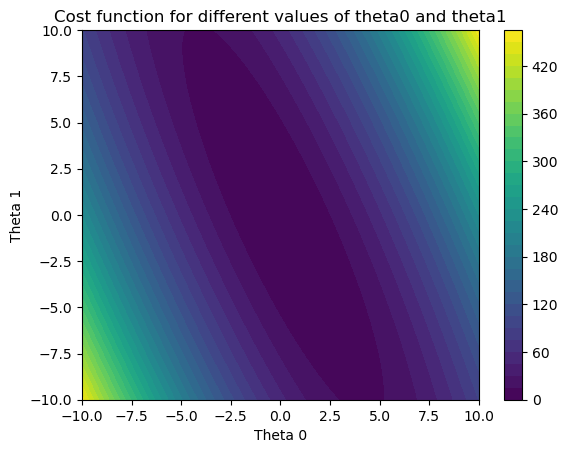

In [157]:
# Define a wide range for theta0 and theta1 based on expected limits in your data
theta0_vals = np.linspace(-10, 10, 100)  # Adjust range as needed based on observation
theta1_vals = np.linspace(-10, 10, 100)

# Initialize a grid to store the cost (loss) values for each theta0, theta1 combination
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Compute the cost for each combination of theta0 and theta1
for c1, theta0 in enumerate(theta0_vals):
    for c2, theta1 in enumerate(theta1_vals):
        t = np.array([theta0, theta1])
        J_vals[c1, c2] = compute_cost(X, y, t)  # compute_cost is the cost function you defined earlier

# Plot the contour plot of the cost function
plt.contourf(theta0_vals, theta1_vals, J_vals, levels=30, cmap="viridis")
plt.colorbar()
plt.xlabel("Theta 0")
plt.ylabel("Theta 1")
plt.title("Cost function for different values of theta0 and theta1")
plt.show()

11. 3D plot of the cost function landscape for θ₀ and θ₁ values, showing where the minimum cost occurs.

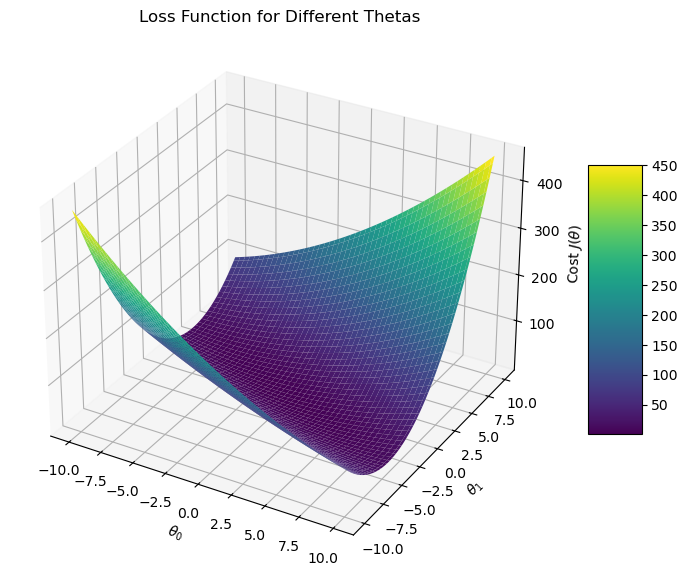

In [189]:
# Create meshgrid for plotting
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)
J_vals_transposed = J_vals.T  # Transpose to align axes correctly

# Create the figure and axes for 3D plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(Theta0, Theta1, J_vals_transposed, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'Cost $J(\theta)$')
ax.set_title('Loss Function for Different Thetas')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

# Save the plot
output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\3D-Loss-F-Basel1960.png'
plt.savefig(output_path)

# Show the plot
plt.show()

---

## Basel, 1990

2. Create Day Index

In [203]:
def create_day_index(year):
    is_leap = calendar.isleap(year)
    days_in_year = 366 if is_leap else 365
    day_indices = np.arange(1, days_in_year + 1).reshape(-1, 1)
    return day_indices

# Create day index for 1990
index_1990 = create_day_index(1990)

3. Creating a subset for Basel in 1990.
4. Drop Unscaled Columns: Since we have already excluded DATE and MONTH, we can proceed with the scaled data.

In [206]:
# Define Basel-specific columns, excluding DATE and MONTH
basel_columns = [col for col in df.columns if 'BASEL' in col]

# Filter data for Basel in 1990
basel_1990 = df[df['DATE'].str.startswith('1990')][basel_columns]

# Display basic info
print("Basel 1990 data shape:", basel_1990.shape)

Basel 1990 data shape: (365, 11)


5. Prepare X and y for Gradient Descent

In [210]:
# Ensure the data has the correct number of rows
n_rows_1990 = basel_1990.shape[0]
index_1990 = index_1990[:n_rows_1990]  # Adjust index if necessary

# Prepare X (feature matrix) and y (target vector)
X_1990 = np.hstack((np.ones((n_rows_1990, 1)), index_1990))
y_1990 = basel_1990['BASEL_temp_mean'].to_numpy().reshape(n_rows_1990, 1)

# Optionally scale the index to improve convergence (e.g., divide by 100)
X_1990[:, 1] = X_1990[:, 1] / 100

# Confirm shapes
print("X_1990 shape:", X_1990.shape)
print("y_1990 shape:", y_1990.shape)

X_1990 shape: (365, 2)
y_1990 shape: (365, 1)


6. Visualize Initial Data

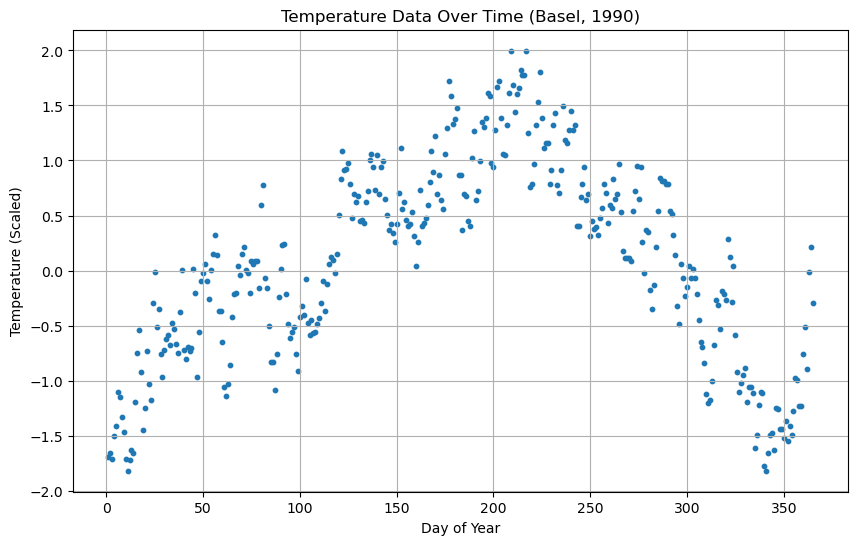

In [214]:
# Plot Basel temperature data for 1990
plt.figure(figsize=(10, 6))
plt.scatter(X_1990[:, 1] * 100, y_1990, s=10)  # Multiply by 100 to get original day numbers
plt.xlabel('Day of Year')
plt.ylabel('Temperature (Scaled)')
plt.title('Temperature Data Over Time (Basel, 1990)')
plt.grid(True)

# Save the plot
#output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\basel_1990_temperature_scatter.png'
#plt.savefig(output_path)
plt.show()

7. Define Cost Function: 

In [217]:
# Cost function for gradient descent
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    sq_errors = (predictions - y) ** 2
    J = (1 / (2 * m)) * np.sum(sq_errors)
    return J

8. Implement Gradient Descent

In [220]:
# Gradient Descent function
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.copy()
    
    for i in range(num_iterations):
        error = X.dot(theta) - y
        gradient = (X.T.dot(error)) / m
        theta = theta - alpha * gradient
        
        # Record history
        J_history.append(compute_cost(X, y, theta))
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
    
    return theta, J_history, theta0_history, theta1_history

9. Run Gradient Descent with initial parameters θ = [0, 0], a chosen learning rate (alpha), and a set number of iterations (num_iterations).

In [223]:
# Initial parameters
initial_theta = np.array([[0], [0]])
alpha = 0.01  # Learning rate; adjust if necessary
num_iterations = 1000  # Increase if necessary

# Run gradient descent for Basel 1990
theta_1990, J_history_1990, theta0_history_1990, theta1_history_1990 = gradient_descent(
    X_1990, y_1990, initial_theta, alpha, num_iterations)

# Display the optimized theta values
print("Optimized theta values for Basel 1990:\n", theta_1990)
#Adjust alpha and num_iterations if the algorithm doesn't converge.

Optimized theta values for Basel 1990:
 [[-0.05556911]
 [ 0.07023157]]


10. Plot Convergence

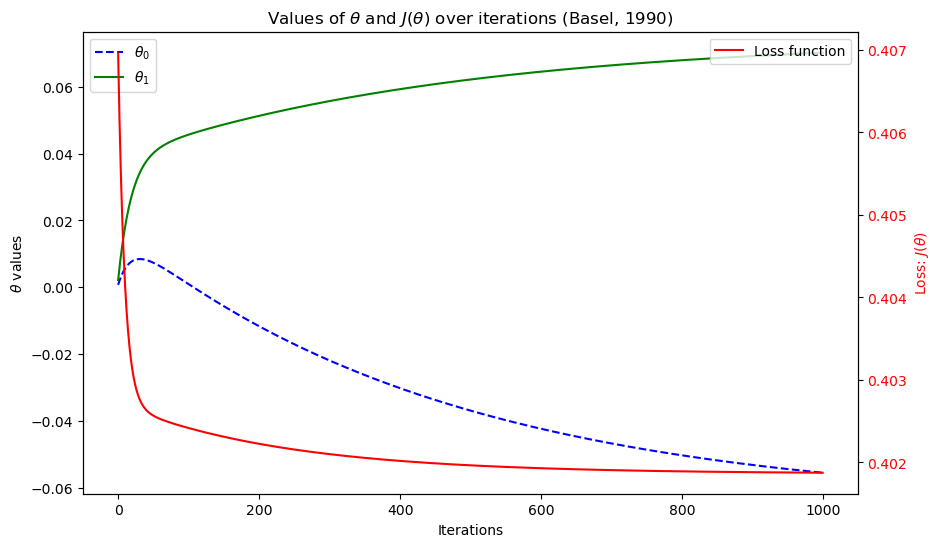

In [226]:
# Plot theta values and loss over iterations for Basel 1990
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot theta0 and theta1 over iterations
ax1.plot(theta0_history_1990, label='$\\theta_{0}$', linestyle='--', color='blue')
ax1.plot(theta1_history_1990, label='$\\theta_{1}$', linestyle='-', color='green')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('$\\theta$ values', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

# Plot loss function over iterations on secondary axis
ax2 = ax1.twinx()
ax2.plot(J_history_1990, label='Loss function', color='red')
ax2.set_ylabel('Loss: $J(\\theta)$', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Values of $\\theta$ and $J(\\theta)$ over iterations (Basel, 1990)')

# Save the plot
output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\gradient_descent_convergence_1990.png'
plt.savefig(output_path)
plt.show()

11. 3D Surface Plot

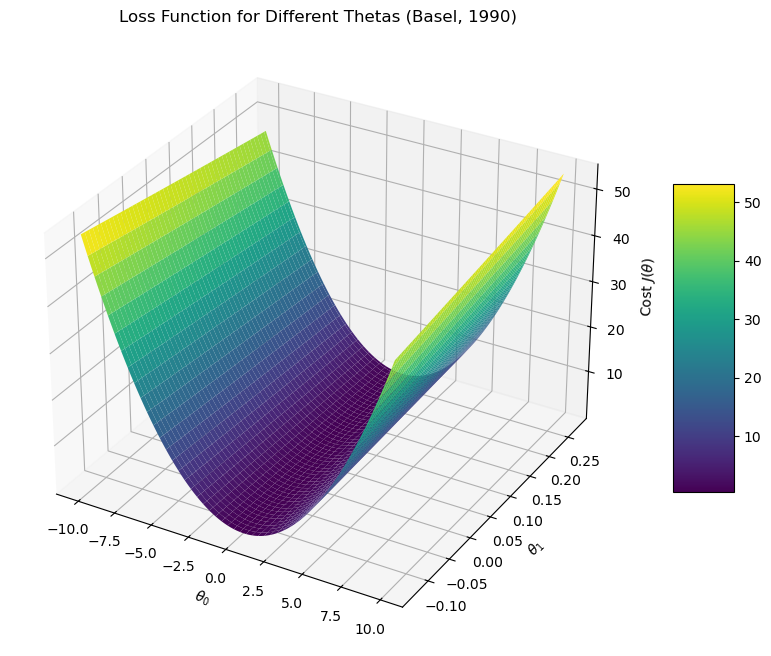

In [229]:
# Define a range for theta0 and theta1 around the optimized theta values
theta0_vals = np.linspace(theta_1990[0][0] - 10, theta_1990[0][0] + 10, 100)
theta1_vals = np.linspace(theta_1990[1][0] - 0.2, theta_1990[1][0] + 0.2, 100)

# Initialize a grid to store the cost function values
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Compute the cost for each combination of theta0 and theta1
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta = np.array([[theta0], [theta1]])
        J_vals[i, j] = compute_cost(X_1990, y_1990, theta)

# Transpose J_vals for correct orientation
J_vals = J_vals.T

# Create meshgrid for plotting
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)

# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Theta0, Theta1, J_vals, cmap='viridis', edgecolor='none')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'Cost $J(\theta)$')
ax.set_title('Loss Function for Different Thetas (Basel, 1990)')
fig.colorbar(surf, shrink=0.5, aspect=5)

# Save the plot
output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\3D-Basel-1990loss_function.png'
plt.savefig(output_path)
plt.show()


---

## Basel, 2020

2. Create Day Index

In [237]:
# Create day index for 2020
index_2020 = create_day_index(2020)

3. Filter by Year

In [240]:
# Filter data for Basel in 2020
basel_2020 = df[df['DATE'].str.startswith('2020')][basel_columns]

# Display basic info
print("Basel 2020 data shape:", basel_2020.shape)

Basel 2020 data shape: (366, 11)


5. Prepare X and y for Gradient Descent

In [243]:
# Ensure the data has the correct number of rows
n_rows_2020 = basel_2020.shape[0]
index_2020 = index_2020[:n_rows_2020]  # Adjust index if necessary

# Prepare X and y
X_2020 = np.hstack((np.ones((n_rows_2020, 1)), index_2020))
y_2020 = basel_2020['BASEL_temp_mean'].to_numpy().reshape(n_rows_2020, 1)

# Optionally scale the index
X_2020[:, 1] = X_2020[:, 1] / 100

# Confirm shapes
print("X_2020 shape:", X_2020.shape)
print("y_2020 shape:", y_2020.shape)

X_2020 shape: (366, 2)
y_2020 shape: (366, 1)


6. Visualize Initial Data

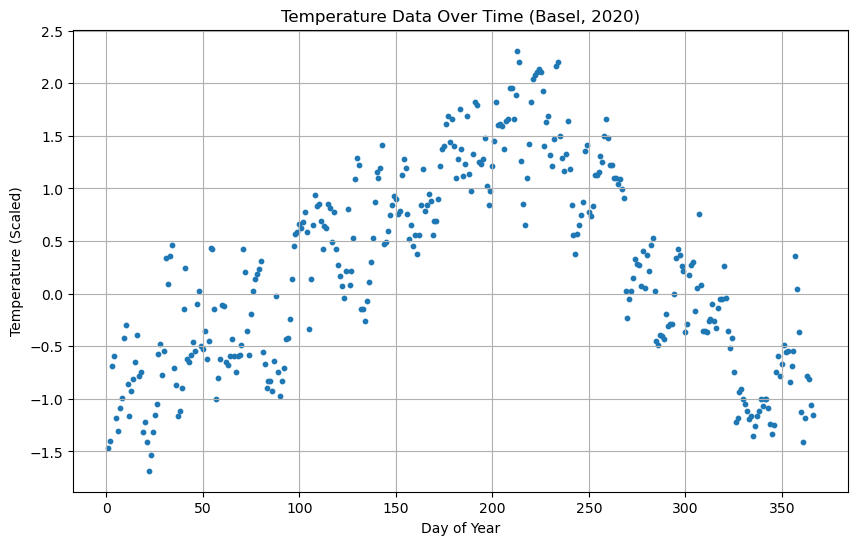

In [246]:
# Plot Basel temperature data for 2020
plt.figure(figsize=(10, 6))
plt.scatter(X_2020[:, 1] * 100, y_2020, s=10)
plt.xlabel('Day of Year')
plt.ylabel('Temperature (Scaled)')
plt.title('Temperature Data Over Time (Basel, 2020)')
plt.grid(True)

# Save the plot
#output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\basel_2020_temperature_scatter.png'
#plt.savefig(output_path)
plt.show()

9. Run Gradient Descent
10. Plot Convergence
11. 3D Surface Plot

Optimized theta values for Basel 2020:
 [[0.06105955]
 [0.09511407]]


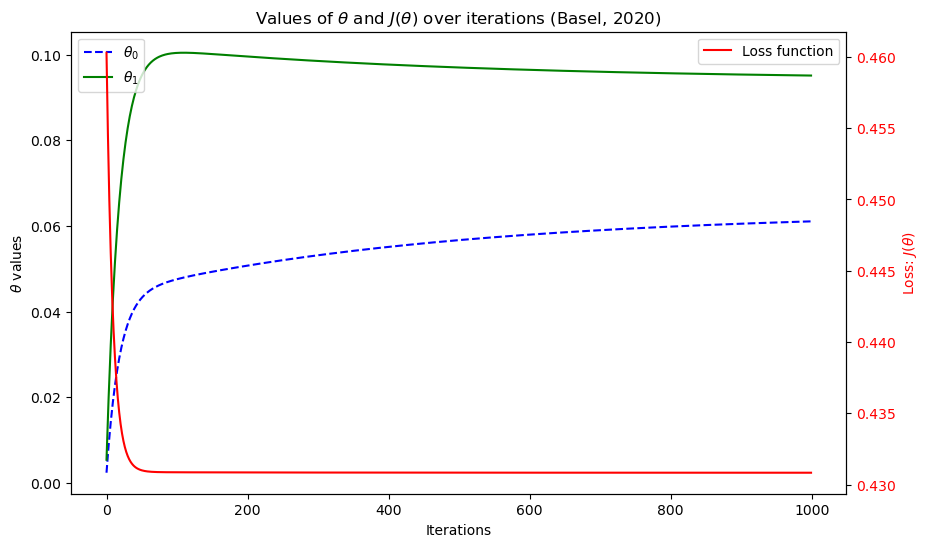

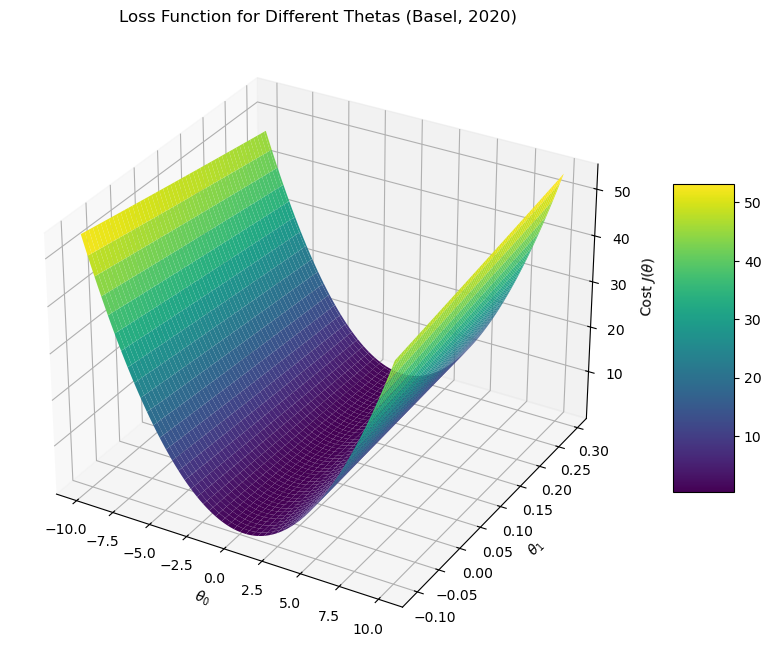

In [252]:
# Initial parameters
initial_theta = np.array([[0], [0]])
alpha = 0.01  # Adjust if necessary
num_iterations = 1000  # Adjust if necessary

# Run gradient descent for Basel 2020
theta_2020, J_history_2020, theta0_history_2020, theta1_history_2020 = gradient_descent(
    X_2020, y_2020, initial_theta, alpha, num_iterations)

# Display the optimized theta values
print("Optimized theta values for Basel 2020:\n", theta_2020)

# Plot theta values and loss over iterations for Basel 2020
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot theta0 and theta1 over iterations
ax1.plot(theta0_history_2020, label='$\\theta_{0}$', linestyle='--', color='blue')
ax1.plot(theta1_history_2020, label='$\\theta_{1}$', linestyle='-', color='green')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('$\\theta$ values', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

# Plot loss function over iterations on secondary axis
ax2 = ax1.twinx()
ax2.plot(J_history_2020, label='Loss function', color='red')
ax2.set_ylabel('Loss: $J(\\theta)$', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Values of $\\theta$ and $J(\\theta)$ over iterations (Basel, 2020)')

# Save the plot
output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\gradient_descent_convergence_2020.png'
plt.savefig(output_path)
plt.show()

# Define a range for theta0 and theta1 around the optimized theta values
theta0_vals = np.linspace(theta_2020[0][0] - 10, theta_2020[0][0] + 10, 100)
theta1_vals = np.linspace(theta_2020[1][0] - 0.2, theta_2020[1][0] + 0.2, 100)

# Initialize a grid to store the cost function values
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Compute the cost for each combination of theta0 and theta1
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta = np.array([[theta0], [theta1]])
        J_vals[i, j] = compute_cost(X_2020, y_2020, theta)

# Transpose J_vals for correct orientation
J_vals = J_vals.T

# Create meshgrid for plotting
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)

# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Theta0, Theta1, J_vals, cmap='viridis', edgecolor='none')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'Cost $J(\theta)$')
ax.set_title('Loss Function for Different Thetas (Basel, 2020)')
fig.colorbar(surf, shrink=0.5, aspect=5)

# Save the plot
output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\cost_function_surface_2020.png'
plt.savefig(output_path)
plt.show()


---

## General Setup
### Define Reusable Functions

In [257]:
# Create Day Index
def create_day_index(year):
    is_leap = calendar.isleap(year)
    days_in_year = 366 if is_leap else 365
    day_indices = np.arange(1, days_in_year + 1).reshape(-1, 1)
    return day_indices

In [270]:
#Prepare Data Function
def prepare_data(df, city, year):
    # Ensure city is uppercase to match column names
    city_upper = city.upper()
    
    # Define city-specific columns
    city_columns = [col for col in df.columns if col.startswith(city_upper + '_')]
    
    # Check if the necessary temperature column exists
    temp_col = f'{city_upper}_temp_mean'
    if temp_col not in city_columns:
        raise ValueError(f"Temperature column '{temp_col}' not found for city '{city_upper}'")
    
    # Filter data for the specified city and year
    city_data = df[df['DATE'].str.startswith(str(year))][city_columns]
    
    # Create day index
    index = create_day_index(year)
    
    # Ensure the data has the correct number of rows
    n_rows = city_data.shape[0]
    index = index[:n_rows]  # Adjust index if necessary
    
    # Prepare X and y
    X = np.hstack((np.ones((n_rows, 1)), index))
    y = city_data[temp_col].to_numpy().reshape(n_rows, 1)
    
    # Optionally scale the index to improve convergence
    X[:, 1] = X[:, 1] / 100
    
    return X, y, city_data

In [263]:
#Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    sq_errors = (predictions - y) ** 2
    J = (1 / (2 * m)) * np.sum(sq_errors)
    return J

In [265]:
#Gradient Descent Function
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.copy()
    
    for i in range(num_iterations):
        error = X.dot(theta) - y
        gradient = (X.T.dot(error)) / m
        theta = theta - alpha * gradient
        
        # Record history
        J_history.append(compute_cost(X, y, theta))
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
    
    return theta, J_history, theta0_history, theta1_history

In [267]:
#Plotting Function for Convergence and Cost Function Surface
def plot_results(X, y, theta, J_history, theta0_history, theta1_history, city, year):
    # Plot theta values and loss over iterations
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color='blue')
    ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color='green')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('$\\theta$ values')
    ax1.legend(loc='upper left')
    
    ax2 = ax1.twinx()
    ax2.plot(J_history, label='Loss function', color='red')
    ax2.set_ylabel('Loss: $J(\\theta)$', color='red')
    ax2.legend(loc='upper right')
    
    plt.title(f'Values of $\\theta$ and $J(\\theta)$ over iterations ({city}, {year})')
    plt.grid(True)
    
    # Save the plot
    output_path = fr'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\gradient_descent_convergence_{city}_{year}.png'
    plt.savefig(output_path)
    plt.show()
    
    # Define a range for theta0 and theta1 around the optimized theta values
    theta0_vals = np.linspace(theta[0][0] - 10, theta[0][0] + 10, 100)
    theta1_vals = np.linspace(theta[1][0] - 0.2, theta[1][0] + 0.2, 100)
    
    # Compute the cost function over a grid of theta values
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            t = np.array([[theta0], [theta1]])
            J_vals[i, j] = compute_cost(X, y, t)
    J_vals = J_vals.T  # Transpose for correct orientation
    
    # Create meshgrid for plotting
    Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)
    
    # Plot the surface
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(Theta0, Theta1, J_vals, cmap='viridis', edgecolor='none')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel(r'Cost $J(\theta)$')
    ax.set_title(f'Loss Function for Different Thetas ({city}, {year})')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    # Save the plot
    output_path = fr'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\cost_function_surface_{city}_{year}.png'
    plt.savefig(output_path)
    plt.show()

---

## Processing Oslo, 1960
 1. Prepare Data



In [273]:
city = 'oslo'
year = 1960

# Prepare data
X, y, city_data = prepare_data(df, city, year)

# Check data shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (366, 2)
y shape: (366, 1)


2. Visualize Initial Data

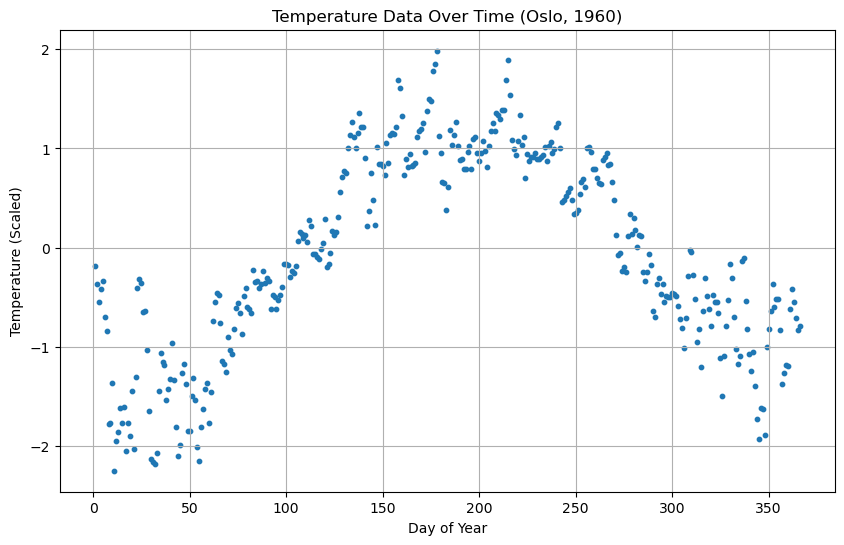

In [276]:
# Plot initial data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1] * 100, y, s=10)  # Multiply by 100 to get original day numbers
plt.xlabel('Day of Year')
plt.ylabel('Temperature (Scaled)')
plt.title(f'Temperature Data Over Time ({city.capitalize()}, {year})')
plt.grid(True)

# Save the plot
output_path = fr'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\{city}_{year}_temperature_scatter.png'
plt.savefig(output_path)
plt.show()


3. Run Gradient Descent and Plot Results

Optimized theta values for Oslo, 1960:
 [[-0.39928864]
 [ 0.18120125]]


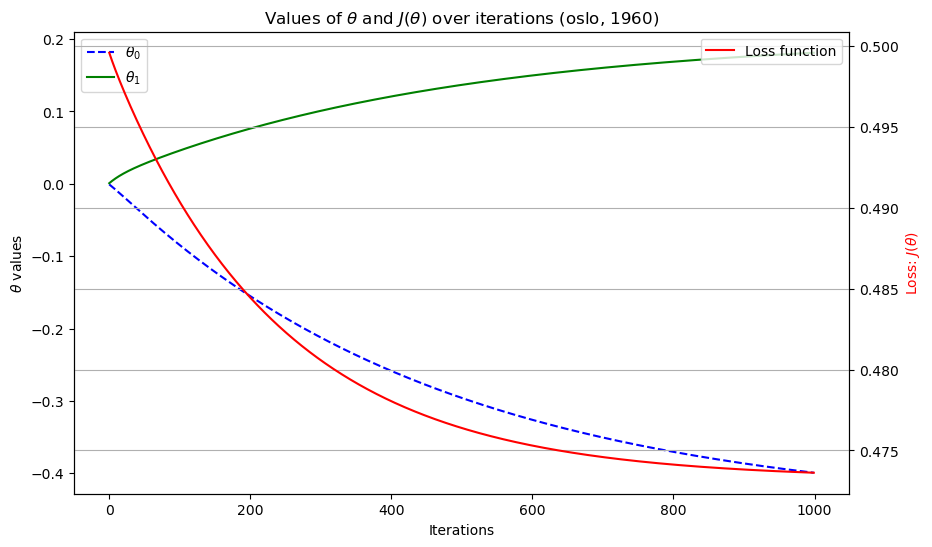

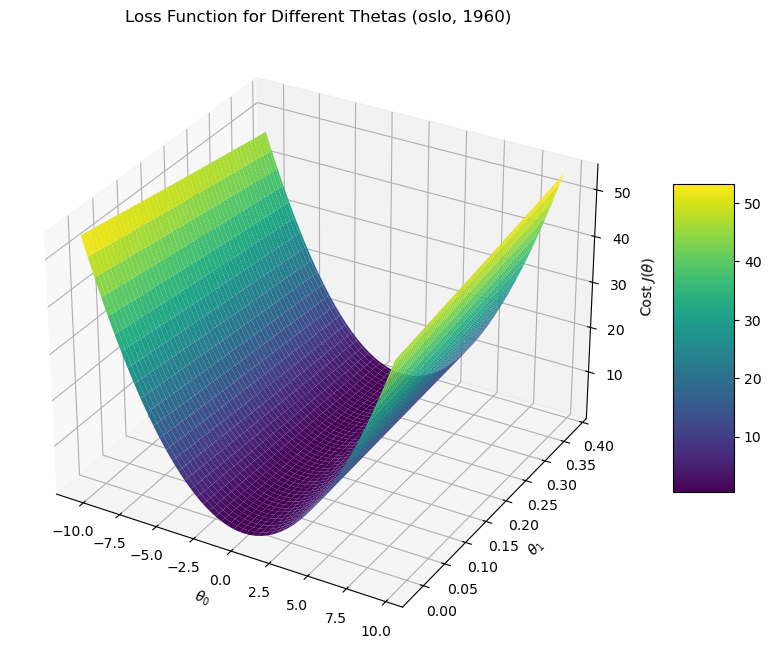

In [279]:
# Initial parameters
initial_theta = np.array([[0], [0]])
alpha = 0.01  # Adjust if necessary
num_iterations = 1000  # Adjust if necessary

# Run gradient descent
theta, J_history, theta0_history, theta1_history = gradient_descent(
    X, y, initial_theta, alpha, num_iterations)

print(f"Optimized theta values for {city.capitalize()}, {year}:\n", theta)

# Plot convergence and cost function surface
plot_results(X, y, theta, J_history, theta0_history, theta1_history, city, year)

## Oslo, 1990

Optimized theta values for Oslo, 1990:
 [[ 0.1534568]
 [-0.0070405]]


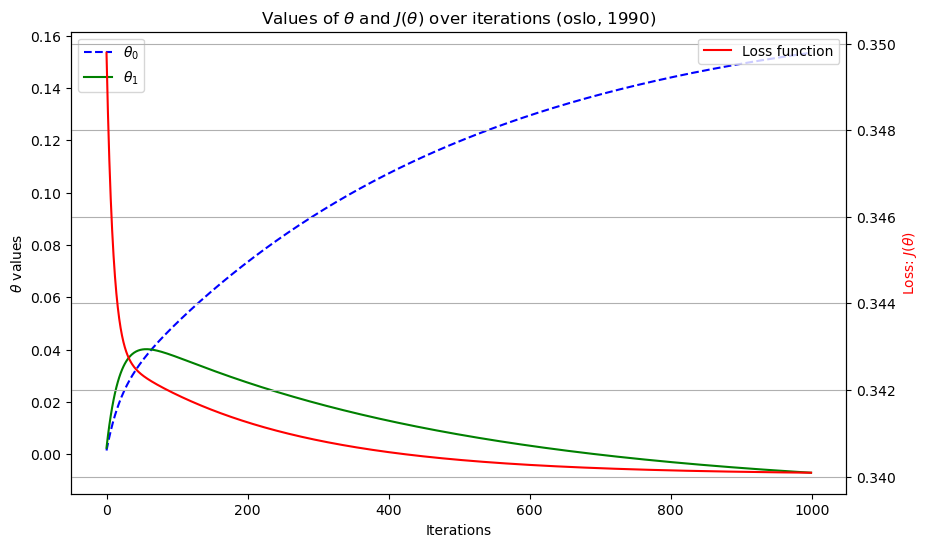

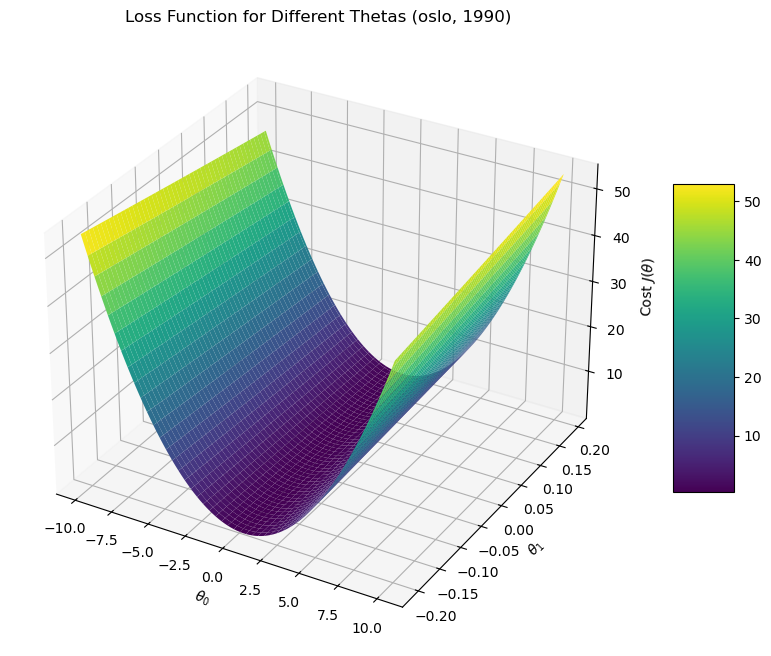

<Figure size 640x480 with 0 Axes>

In [284]:
city = 'oslo'
year = 1990

# Prepare data
X, y, city_data = prepare_data(df, city, year)

# Run gradient descent and plot results
theta, J_history, theta0_history, theta1_history = gradient_descent(
    X, y, initial_theta, alpha, num_iterations)

print(f"Optimized theta values for {city.capitalize()}, {year}:\n", theta)

plot_results(X, y, theta, J_history, theta0_history, theta1_history, city, year)

# Save the plot
output_path = fr'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\{city}_{year}.png'
plt.savefig(output_path)

## Oslo, 2020

Optimized theta values for Oslo, 2020:
 [[0.02016187]
 [0.13990254]]


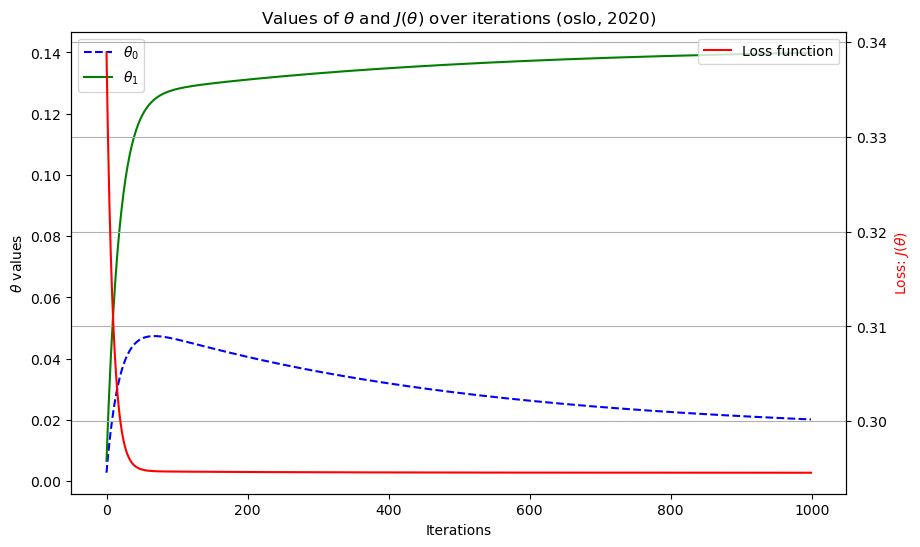

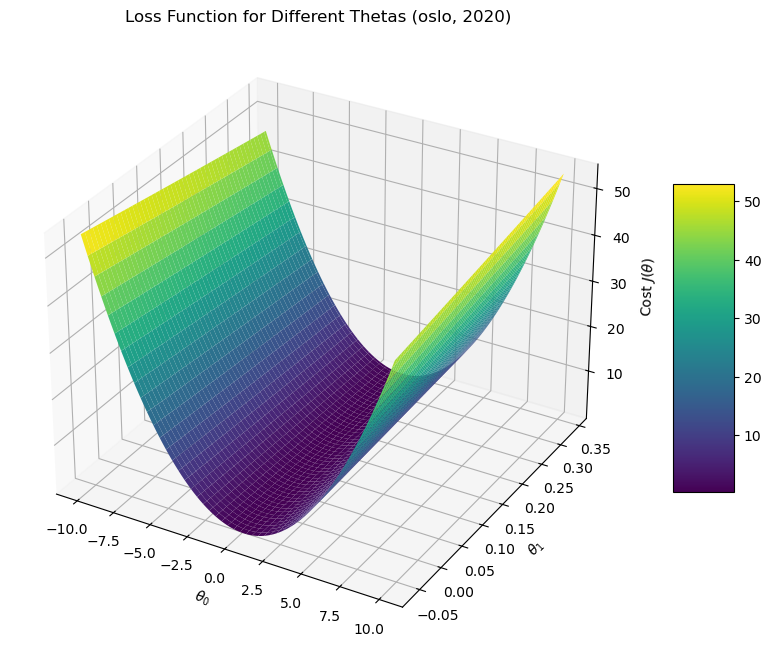

<Figure size 640x480 with 0 Axes>

In [287]:
city = 'oslo'
year = 2020

# Prepare data
X, y, city_data = prepare_data(df, city, year)

# Check data availability
if X.size == 0 or y.size == 0:
    print(f"No data available for {city.capitalize()}, {year}.")
else:
    # Run gradient descent and plot results
    theta, J_history, theta0_history, theta1_history = gradient_descent(
        X, y, initial_theta, alpha, num_iterations)

    print(f"Optimized theta values for {city.capitalize()}, {year}:\n", theta)

    # Plot results
    plot_results(X, y, theta, J_history, theta0_history, theta1_history, city, year)

    # Save the last plot if needed (though plot_results already saves the plots)
    output_path = fr'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\{city}_{year}_respective_chart.png'
    plt.savefig(output_path)

---

## Heathrow, 1960

Optimized theta values for Heathrow, 1960:
 [[-0.36104795]
 [ 0.14605921]]


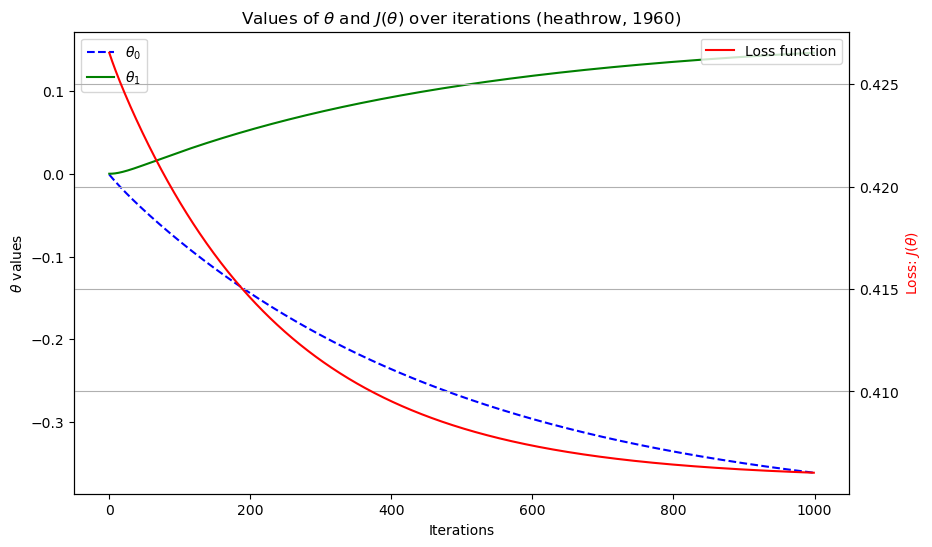

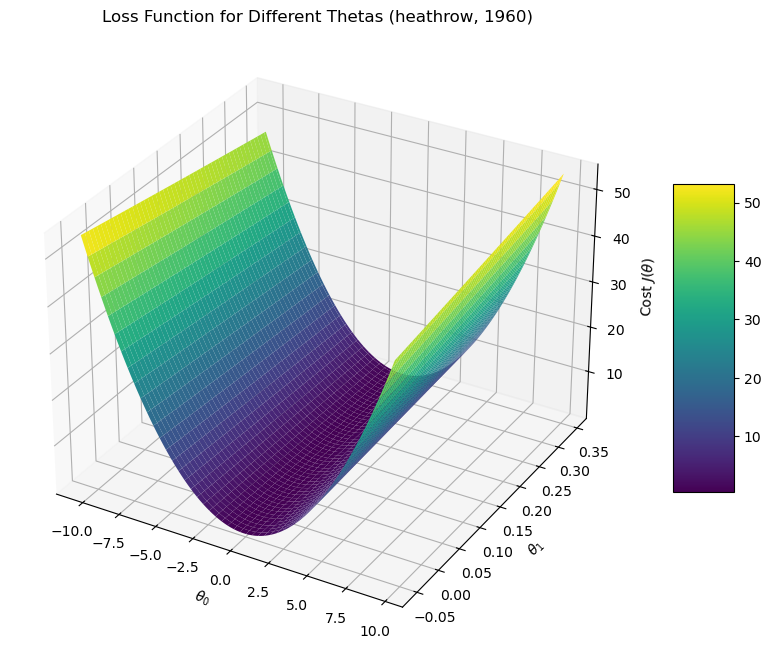

<Figure size 640x480 with 0 Axes>

In [291]:
city = 'heathrow'
year = 1960

# Prepare data
X, y, city_data = prepare_data(df, city, year)

# Check data availability
if X.size == 0 or y.size == 0:
    print(f"No data available for {city.capitalize()}, {year}.")
else:
    # Run gradient descent and plot results
    theta, J_history, theta0_history, theta1_history = gradient_descent(
        X, y, initial_theta, alpha, num_iterations)

    print(f"Optimized theta values for {city.capitalize()}, {year}:\n", theta)

    # Plot results
    plot_results(X, y, theta, J_history, theta0_history, theta1_history, city, year)

    # Save the last plot if needed
    output_path = fr'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\{city}_{year}_respective_chart.png'
    plt.savefig(output_path)

## Heathrow, 1990

Optimized theta values for Heathrow, 1990:
 [[-0.00573714]
 [ 0.08717026]]


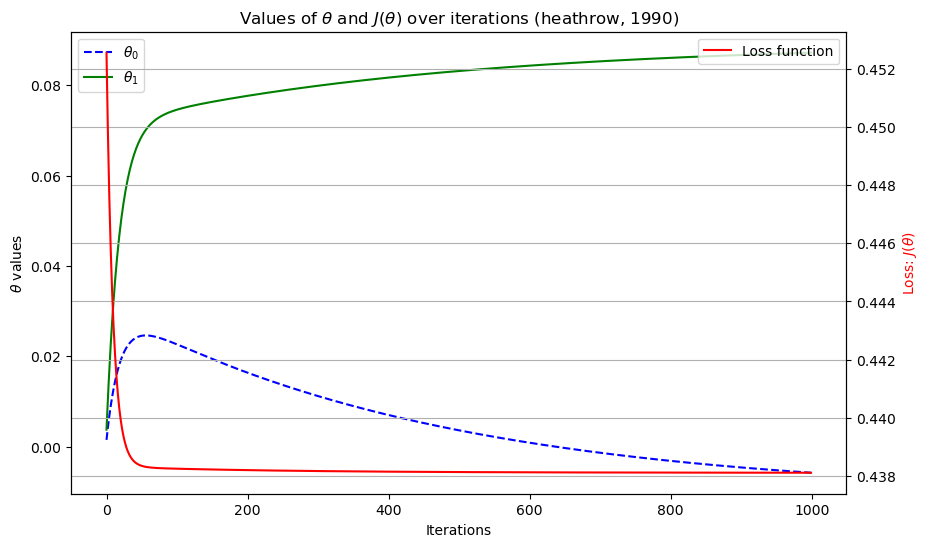

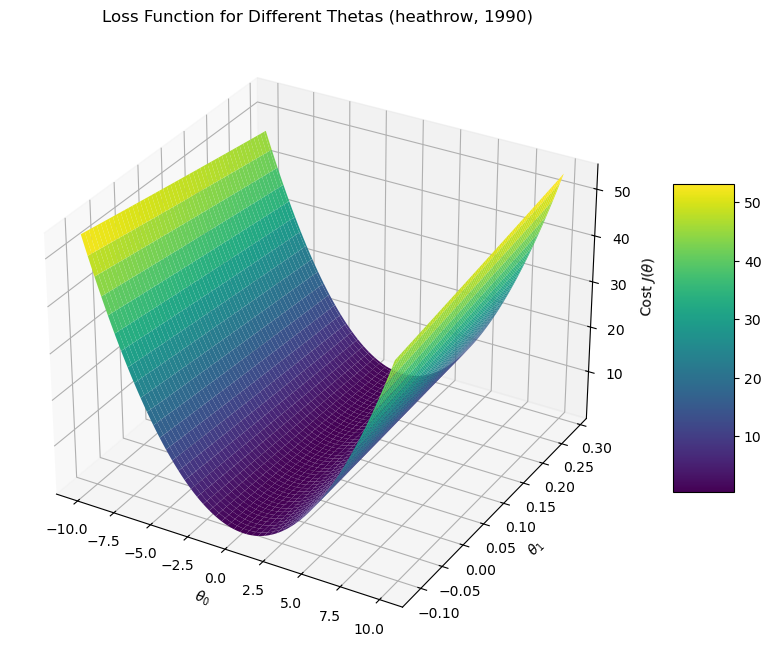

<Figure size 640x480 with 0 Axes>

In [294]:
city = 'heathrow'
year = 1990

# Prepare data
X, y, city_data = prepare_data(df, city, year)

# Check data availability
if X.size == 0 or y.size == 0:
    print(f"No data available for {city.capitalize()}, {year}.")
else:
    # Run gradient descent and plot results
    theta, J_history, theta0_history, theta1_history = gradient_descent(
        X, y, initial_theta, alpha, num_iterations)

    print(f"Optimized theta values for {city.capitalize()}, {year}:\n", theta)

    # Plot results
    plot_results(X, y, theta, J_history, theta0_history, theta1_history, city, year)

    # Save the last plot if needed
    output_path = fr'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\{city}_{year}_respective_chart.png'
    plt.savefig(output_path)

## Heathrow, 2020

Optimized theta values for Heathrow, 2020:
 [[0.01269466]
 [0.12530161]]


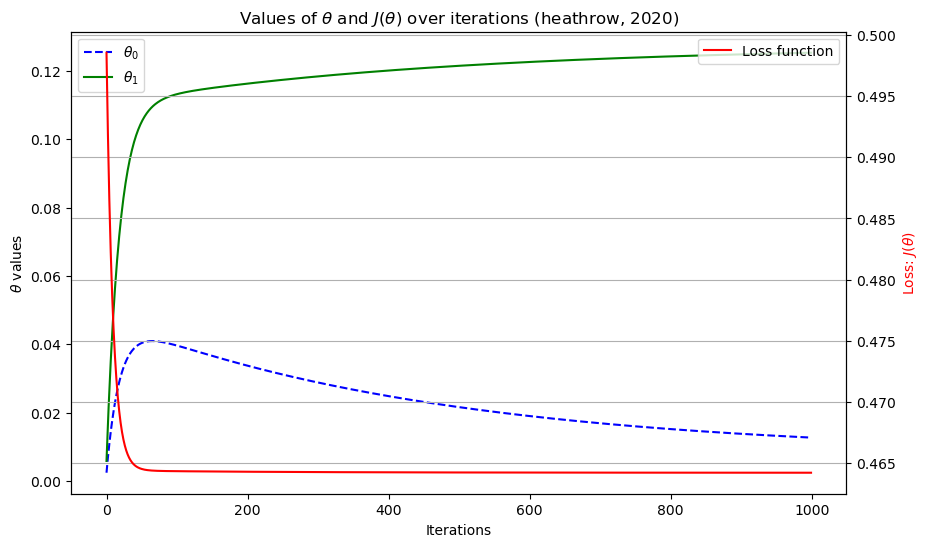

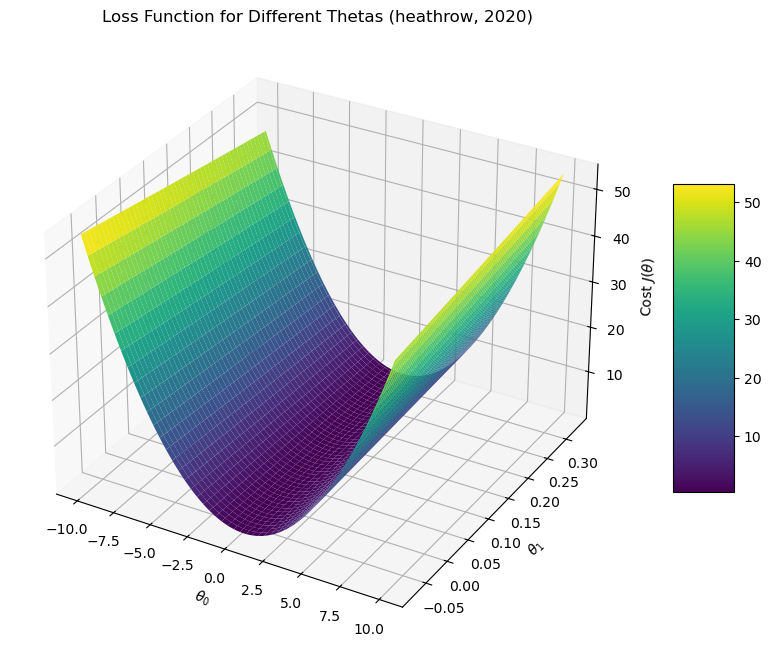

<Figure size 640x480 with 0 Axes>

In [297]:
city = 'heathrow'
year = 2020

# Prepare data
X, y, city_data = prepare_data(df, city, year)

# Check data availability
if X.size == 0 or y.size == 0:
    print(f"No data available for {city.capitalize()}, {year}.")
else:
    # Run gradient descent and plot results
    theta, J_history, theta0_history, theta1_history = gradient_descent(
        X, y, initial_theta, alpha, num_iterations)

    print(f"Optimized theta values for {city.capitalize()}, {year}:\n", theta)

    # Plot results
    plot_results(X, y, theta, J_history, theta0_history, theta1_history, city, year)

    # Save the last plot if needed
    output_path = fr'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\{city}_{year}_respective_chart.png'
    plt.savefig(output_path)